<a href="https://colab.research.google.com/github/haritmm97/ML-Projects-Portfolio/blob/master/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement:** A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value.For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighbourhoodand based on gathered data you will try to assess your house price.

**Objective:**
Take advantage of all of the feature variables available below,use it to analyse and predict house prices.
1.cid: a notation for a house
2.dayhours: Date house was sold
3.price: Price is prediction target
4.room_bed: Number of Bedrooms/House
5.room_bath: Number of bathrooms/bedrooms
6.living_measure: square footage of the home
7.lot_measure: quare footage of the lot
8.ceil: Total floors (levels) in house
9.coast: House which has a view to a waterfront
10.sight: Has been viewed
11.condition: How goodthe condition is (Overall)
12.quality: grade given to the housing unit, based on grading system
13.ceil_measure: square footage of house apart from basement
14.basement_measure: square footage of the basement
15.yr_built: Built Year
16.yr_renovated: Year when house was renovated
17.zipcode: zip
18.lat: Latitude coordinate
19.long: Longitude coordinate
20.living_measure15: Living room area in 2015(implies--some renovations) This might or might not have affected the lotsize area
21.lot_measure15: lotSizearea in 2015(implies--some renovations)
22.furnished: Based on the quality of room 
23: total_area: Measure of both living and lot


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Importing Libraries

In [0]:
#For numerical libraries
import numpy as np
#To handle data in the form of rows and columns
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample

## 2. Loading Dataset

In [0]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Machine Learning/Great Learning/Capstone/innercity.csv")

In [45]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [46]:
df.tail()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
21608,5137800030,20140701T000000,300000,4,2.50,2303,3826,2.0,0,0,3,8,2303,0,2006,0,98092,47.3258,-122.165,2516,4500,0,6129
21609,8562890910,20140619T000000,320000,4,2.50,3490,5000,2.0,0,0,3,8,3490,0,2003,0,98042,47.3772,-122.127,2910,5025,0,8490
21610,1442880160,20140627T000000,483453,4,2.75,2790,5527,2.0,0,0,3,8,2790,0,2014,0,98045,47.4827,-121.773,2620,5509,0,8317
21611,622100130,20140917T000000,365000,2,2.00,1440,15000,1.0,0,0,3,7,1440,0,1985,0,98072,47.7648,-122.159,1780,15000,0,16440
21612,6413600276,20150324T000000,354950,3,1.00,970,5922,1.5,0,0,3,7,970,0,1949,0,98125,47.7190,-122.321,1730,6128,0,6892


## 3. Exploratory Data Analysis

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

#### 3.1 Analysis on price variable: the variable we're trying to predict

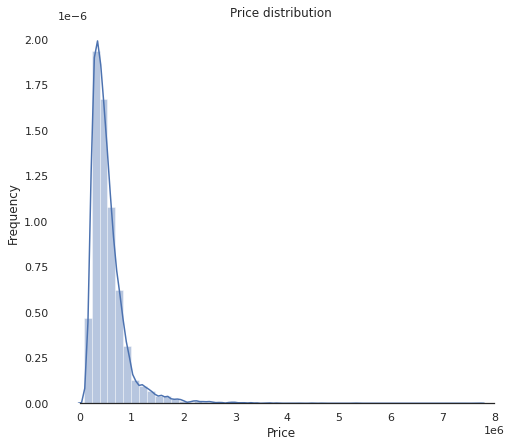

In [49]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df['price'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Price")
ax.set(title="Price distribution")
sns.despine(trim=True, left=True)
plt.show()

In [50]:
# Skew and kurt
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 4.021716
Kurtosis: 34.522444


Skewness values is more than 1, indicates data is skewed.
Kurtosis value is very high.

This indicates the data is not normally distributed

In [51]:
print('Minimum price: ', df['price'].min())
print('Maximum price: ',df['price'].max())
print('Mean value: ', df['price'].mean())
print('Median value: ',df['price'].median())
print('Standard deviation: ', df['price'].std())
print('Range of values: ', df['price'].max()-df['price'].min())

Minimum price:  75000
Maximum price:  7700000
Mean value:  540182.1587933188
Median value:  450000.0
Standard deviation:  367362.2317180104
Range of values:  7625000


In [52]:
Q1=df['price'].quantile(q=0.25)
Q3=df['price'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['price']))

1st Quartile (Q1) is:  321950.0
3st Quartile (Q3) is:  645000.0
Interquartile range (IQR) is  323050.0


In [53]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers: ', L_outliers)
print('Upper outliers: ', U_outliers)

Lower outliers:  -162625.0
Upper outliers:  1129575.0


In [54]:
print('Number of outliers in price upper : ', df[df['price']>1129575.0]['price'].count())
print('Number of outliers in price lower : ', df[df['price']<-162625.0]['price'].count())
print('% of Outlier in price upper: ',round(df[df['price']>1129575.0]['price'].count()*100/len(df)), '%')
print('% of Outlier in price lower: ',round(df[df['price']<-162625.0]['price'].count()*100/len(df)), '%')

Number of outliers in price upper :  1159
Number of outliers in price lower :  0
% of Outlier in price upper:  5.0 %
% of Outlier in price lower:  0.0 %


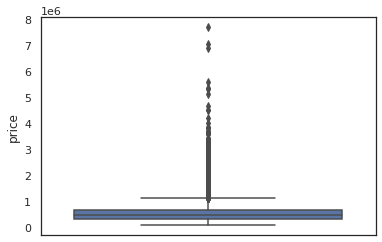

In [55]:
#boxplot of price variable
sns.boxplot(x='price',data=df,orient='v')

In [56]:
df['coast'] = pd.Categorical(df.coast)
df['sight'] = pd.Categorical(df.sight)
df['quality'] = pd.Categorical(df.quality)
df['furnished'] = pd.Categorical(df.furnished)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null category
sight               21613 non-null category
condition           21613 non-null int64
quality             21613 non-null category
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished   

In [57]:
df['dayhours'].value_counts()

20140623T000000    142
20140625T000000    131
20140626T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20140803T000000      1
20150308T000000      1
20150131T000000      1
20140830T000000      1
20150524T000000      1
Name: dayhours, Length: 372, dtype: int64

In [58]:
df['room_bed'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: room_bed, dtype: int64

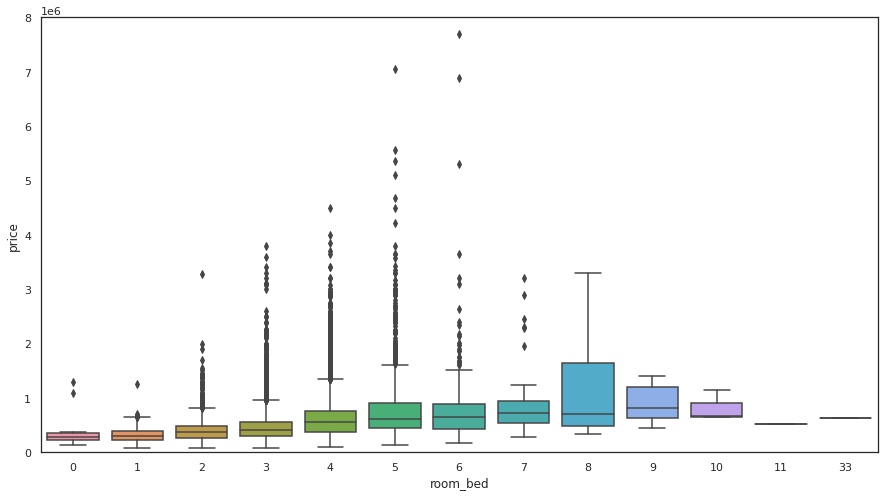

In [59]:
data = pd.concat([df['price'], df['room_bed']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=df['room_bed'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

In [60]:
df['room_bath'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: room_bath, dtype: int64

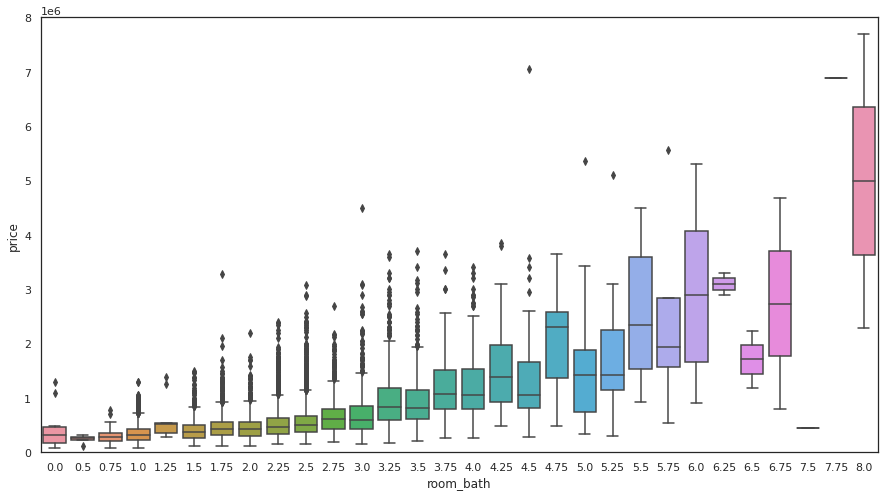

In [66]:
data = pd.concat([df['price'], df['room_bath']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=df['room_bath'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

In [61]:
df['coast'].value_counts()

0    21450
1      163
Name: coast, dtype: int64

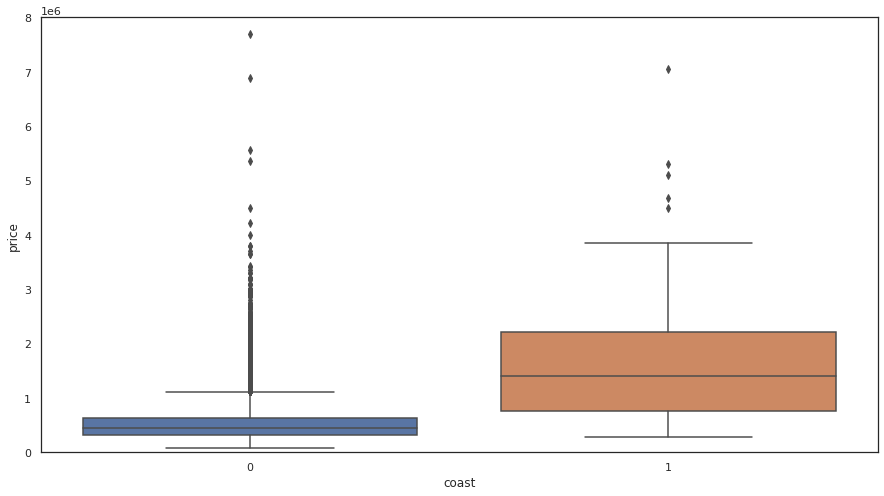

In [67]:
data = pd.concat([df['price'], df['coast']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=df['coast'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

In [62]:
df['sight'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: sight, dtype: int64

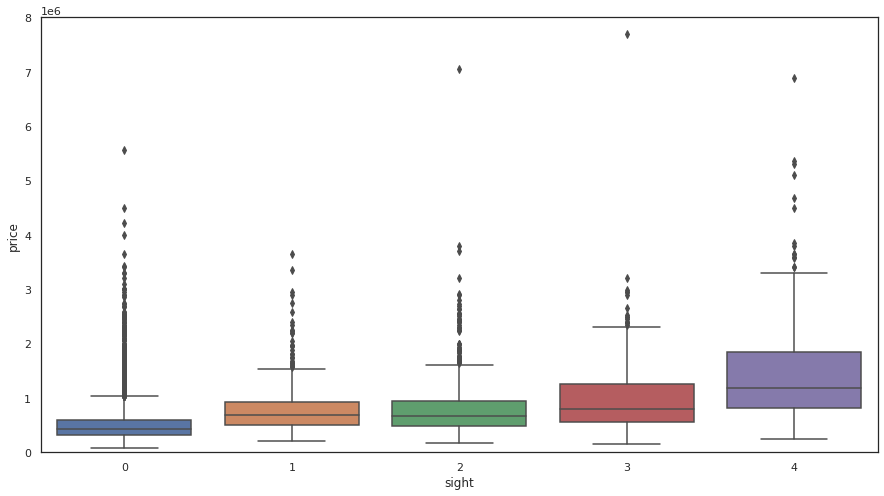

In [68]:
data = pd.concat([df['price'], df['sight']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=df['sight'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

In [63]:
df['quality'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: quality, dtype: int64

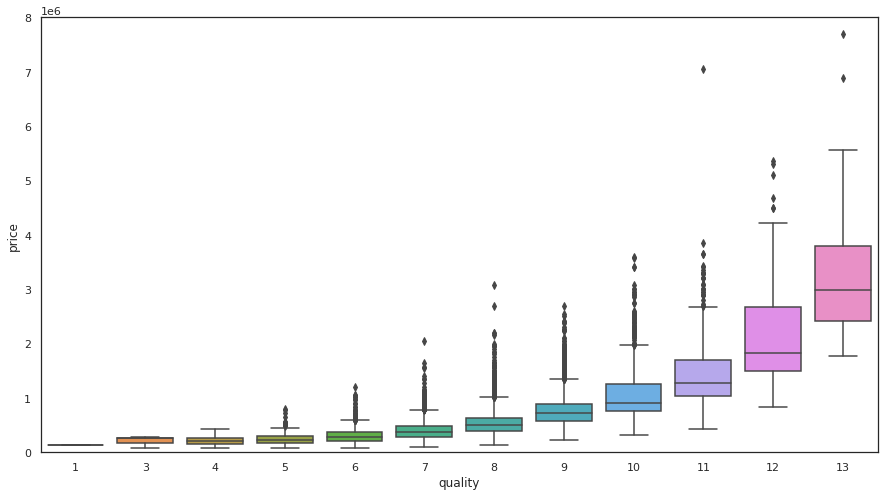

In [69]:
data = pd.concat([df['price'], df['quality']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=df['quality'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

In [64]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

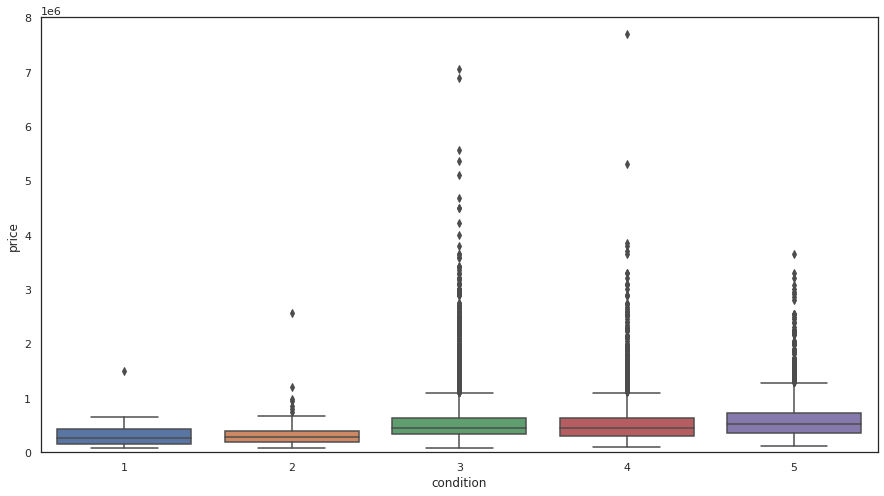

In [70]:
data = pd.concat([df['price'], df['condition']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=df['condition'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

In [65]:
df['furnished'].value_counts()

0    17362
1     4251
Name: furnished, dtype: int64

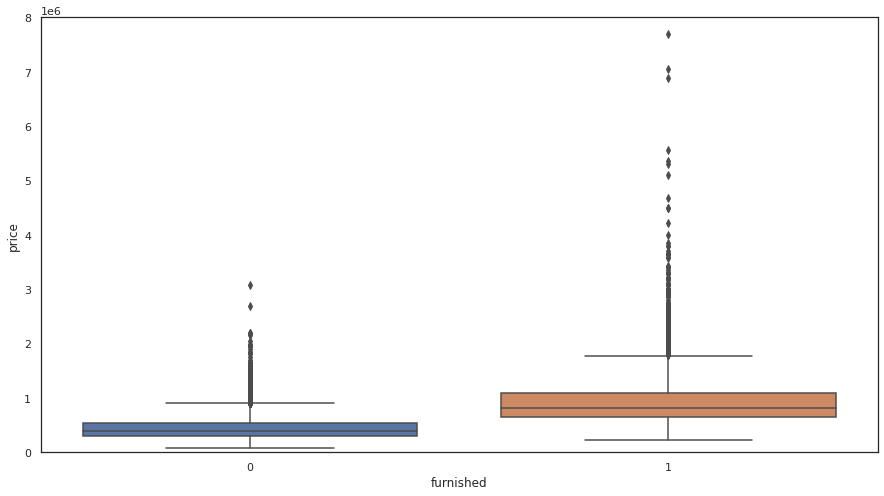

In [71]:
data = pd.concat([df['price'], df['furnished']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=df['furnished'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);